# Feature Detection

In [264]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

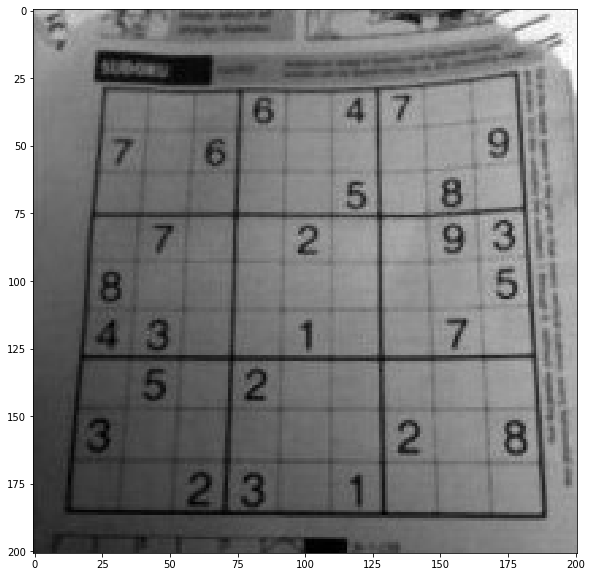

In [265]:
image = cv2.imread('../images/sudoku.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
_ = plt.imshow(image, cmap='gray')

## Harris Corner Detector

In [266]:
def normalize(image):
    minimum, maximum = np.min(image), np.max(image)
    return (image - minimum) * 255.0 / (maximum - minimum)

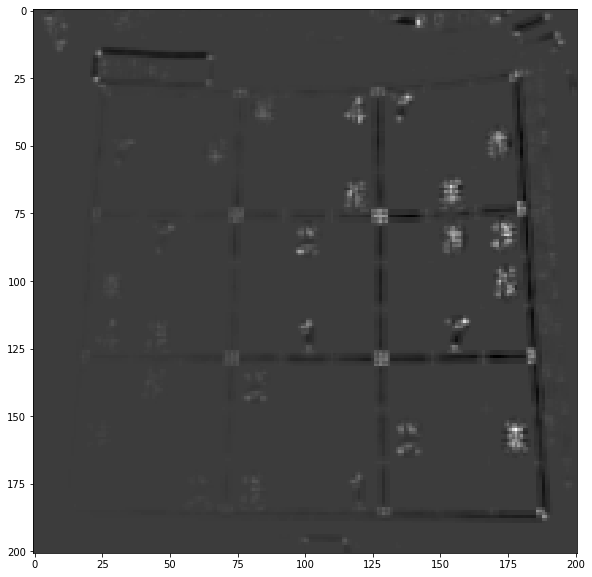

In [267]:
harris_corner_image = cv2.cornerHarris(gray_image, 3, 3, 0.05)
plt.figure(figsize=(10, 10))
_ = plt.imshow(harris_corner_image, cmap='gray')

### Harris Corner Detector Area
![Harris Corner Detector](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/harris_region.jpg)

## Shi-Tomasi Corner Detector

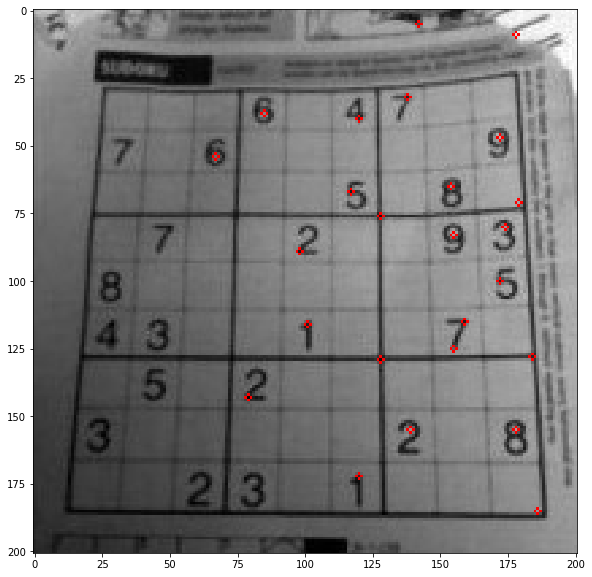

In [268]:
shi_tomasi_corners = cv2.goodFeaturesToTrack(gray_image, 25, 0.01, 10)
shi_tomasi_corner_image = image.copy()
plt.figure(figsize=(10, 10))

for [[x, y]] in shi_tomasi_corners:
    cv2.circle(shi_tomasi_corner_image, (x, y), 1, (255, 0, 0))
    
_ = plt.imshow(shi_tomasi_corner_image, cmap='gray')

### Shi-Tomasi Corner Detector Area
![Shi-Tomasi Corner Detector](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/shitomasi_space.png)

## SIFT (Scale-Invariant Feature Transform)

300


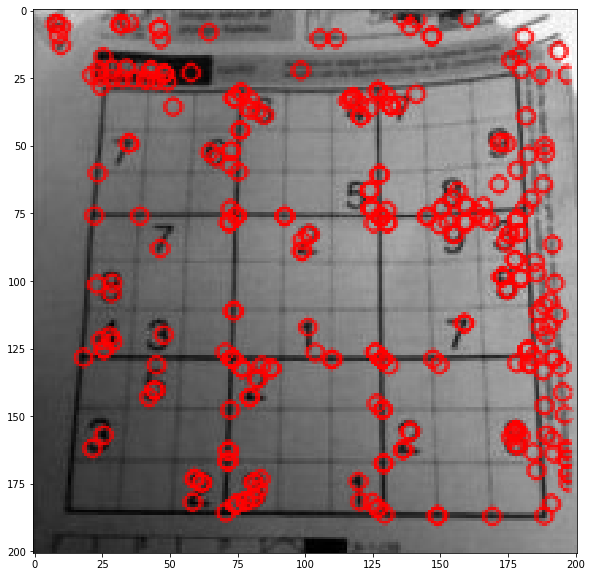

In [269]:
sift = cv2.xfeatures2d.SIFT_create(300)
sift_keypoints = sift.detect(image, None)
print(len(sift_keypoints))

sift_image = cv2.drawKeypoints(image, sift_keypoints, None, color=(255,0,0))
plt.figure(figsize=(10, 10))
_ = plt.imshow(sift_image, cmap='gray')

### Difference of Gaussians

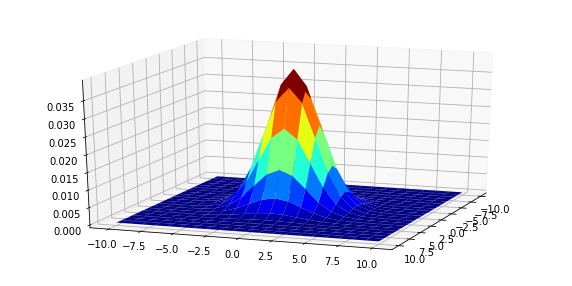

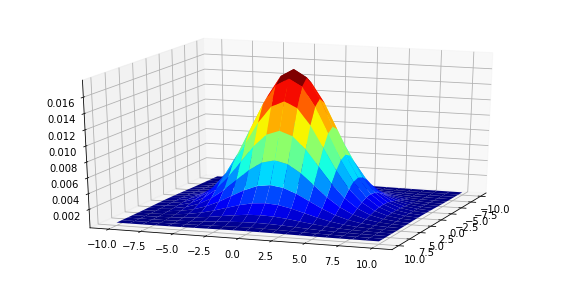

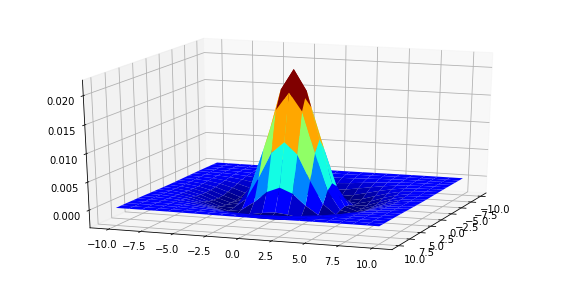

In [270]:
import scipy.ndimage
from mpl_toolkits import mplot3d

peak_image = np.zeros(shape=(21, 21))
peak_image[10, 10] = 1
gaussian_filter_2 = scipy.ndimage.gaussian_filter(peak_image, sigma=2)
gaussian_filter_3 = scipy.ndimage.gaussian_filter(peak_image, sigma=3)
diff_of_gaussian = gaussian_filter_2 - gaussian_filter_3

def plot3d(Z):
    plt.figure(figsize=(10, 5))
    X, Y = np.meshgrid(np.linspace(-10, 10, 21),
                       np.linspace(-10, 10, 21))
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
    ax.view_init(20, 20)
    plt.show()

plot3d(gaussian_filter_2)
plot3d(gaussian_filter_3)
plot3d(diff_of_gaussian)

## SIFT (Scale-Invariant Feature Transform)

214
(214, 64)


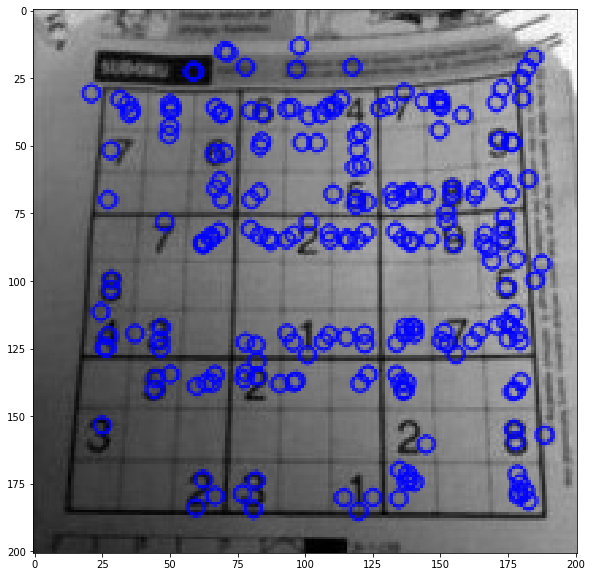

In [271]:
surf = cv2.xfeatures2d.SURF_create(500)
surf_keypoints, descriptors = surf.detectAndCompute(image, None)
print(len(surf_keypoints))
print(descriptors.shape)

surf_image = cv2.drawKeypoints(image, surf_keypoints, None, color=(0,0,255))
plt.figure(figsize=(10, 10))
_ = plt.imshow(surf_image, cmap='gray')

210


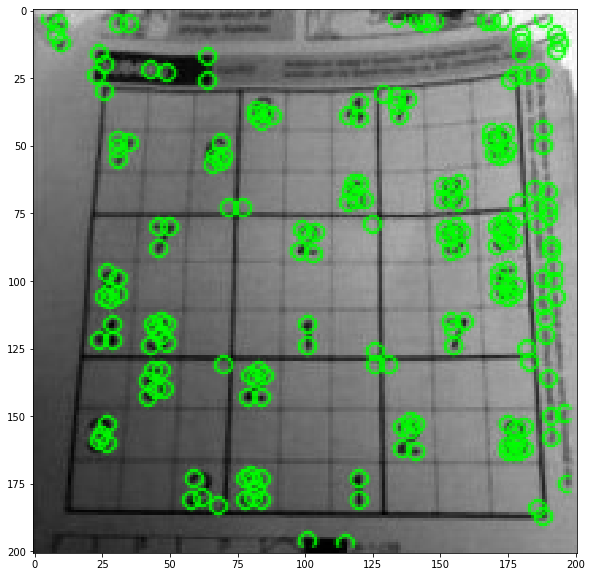

In [272]:
fast = cv2.FastFeatureDetector().create(40)
fast_keypoints = fast.detect(image, None)
print(len(fast_keypoints))

fast_image = cv2.drawKeypoints(image, fast_keypoints, None, color=(0,255,0))
plt.figure(figsize=(10, 10))
_ = plt.imshow(fast_image, cmap='gray')

## Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_table_of_contents_feature2d/py_table_of_contents_feature2d.html